# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | bazas
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | fort stockton
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | grand-bourg
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | vadso
Processing Record 17 of Set 1 | manga
Processing Record 18 of Set 1 | vilyuchinsk
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | ancud
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | pimenta bueno
Processin

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,289.49,70,20,5.14,CA,1722654019
1,bethel,41.3712,-73.4140,298.16,89,20,0.00,US,1722653870
2,port-aux-francais,-49.3500,70.2167,275.37,79,68,11.22,TF,1722654021
3,bazas,44.4320,-0.2133,287.73,98,13,1.57,FR,1722654022
4,waitangi,-43.9535,-176.5597,281.94,82,100,2.68,NZ,1722654023


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,289.49,70,20,5.14,CA,1722654019
1,bethel,41.3712,-73.4140,298.16,89,20,0.00,US,1722653870
2,port-aux-francais,-49.3500,70.2167,275.37,79,68,11.22,TF,1722654021
3,bazas,44.4320,-0.2133,287.73,98,13,1.57,FR,1722654022
4,waitangi,-43.9535,-176.5597,281.94,82,100,2.68,NZ,1722654023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

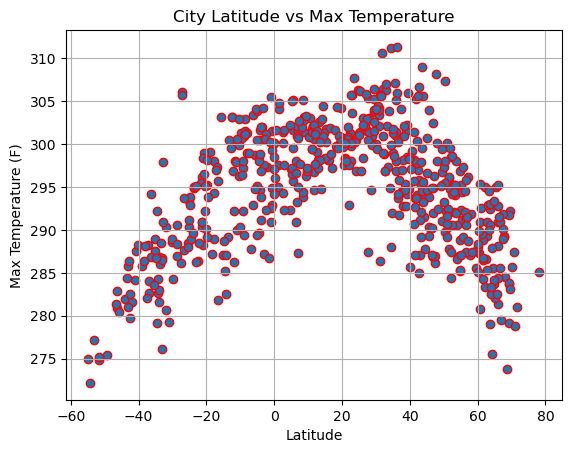

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="red")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

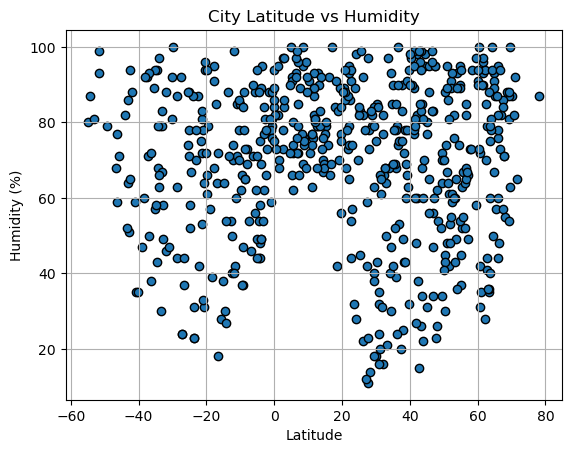

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

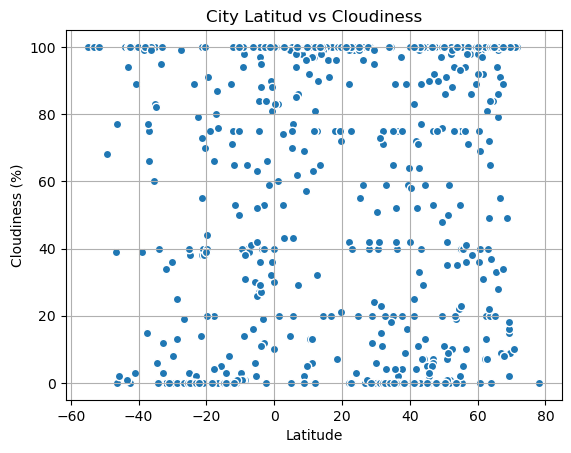

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="white")

# Incorporate the other graph properties
plt.title("City Latitud vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

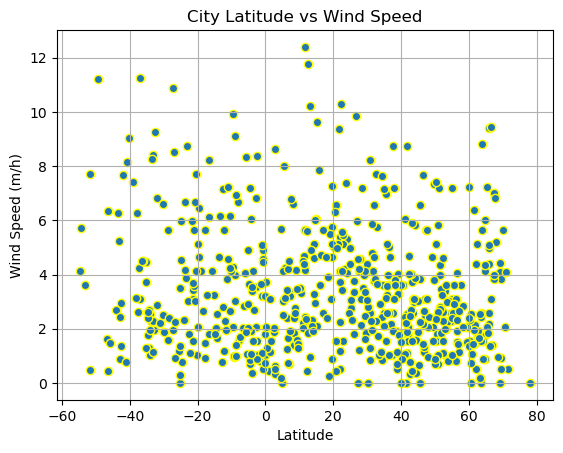

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="yellow")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/h)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    print(f" The R squared is: {rvalue**2:.2f}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,289.49,70,20,5.14,CA,1722654019
1,bethel,41.3712,-73.4140,298.16,89,20,0.00,US,1722653870
3,bazas,44.4320,-0.2133,287.73,98,13,1.57,FR,1722654022
6,talnakh,69.4865,88.3972,292.25,63,9,0.91,RU,1722654026
8,fort stockton,30.8940,-102.8793,304.18,32,0,4.12,US,1722654028


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,275.37,79,68,11.22,TF,1722654021
4,waitangi,-43.9535,-176.5597,281.94,82,100,2.68,NZ,1722654023
5,rio grande,-32.0350,-52.0986,290.34,88,34,6.83,BR,1722654025
7,blackmans bay,-43.0167,147.3167,285.78,64,100,0.89,AU,1722654027
9,puerto natales,-51.7236,-72.4875,274.83,99,100,0.49,CL,1722654029


###  Temperature vs. Latitude Linear Regression Plot

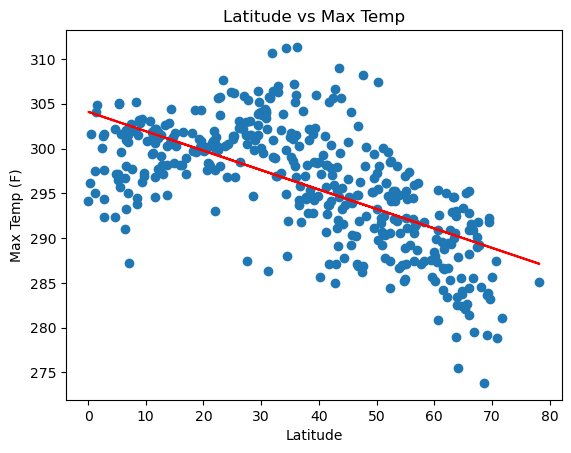

 The R squared is: 0.40


In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude vs Max Temp", "Latitude", "Max Temp (F)", (10,40))

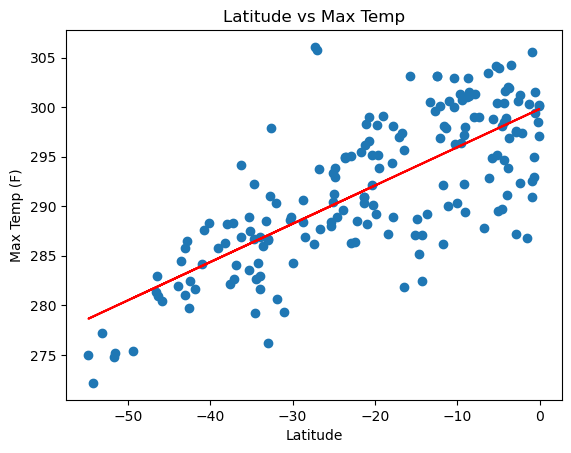

 The R squared is: 0.56


In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude vs Max Temp", "Latitude", "Max Temp (F)", (-50,80))

**Discussion about the linear relationship: in the notherm emisphere, we could see that there is a negative correlation between tempt abd Latitude while in the southern emisphere there are a positive correlation between those 2 atributes. Also is important that as a conclusion we could see that the more close to the Latitude 0 the weather tend to be hotter. 

### Humidity vs. Latitude Linear Regression Plot

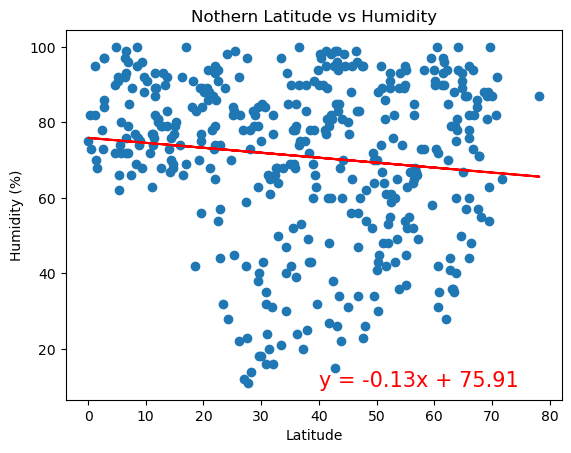

 The R squared is: 0.01


In [18]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Humidity"]
plot_linear_regression(x_values, y_values, "Nothern Latitude vs Humidity", "Latitude", "Humidity (%)", (40,10))

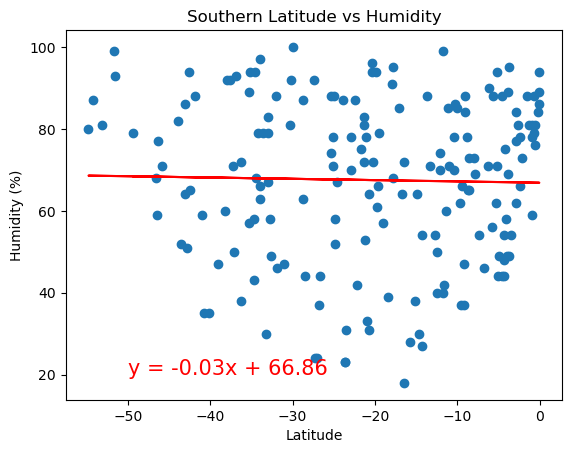

 The R squared is: 0.00


In [19]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Humidity"]
plot_linear_regression(x_values, y_values, "Southern Latitude vs Humidity", "Latitude", "Humidity (%)", (-50,20))

**Discussion about the linear relationship:** We can see in the nothern and southern linear regreation that there are no significant correlation between these variables. R is closer to 0. So it means that there are other factors different than the location and humidty.

### Cloudiness vs. Latitude Linear Regression Plot

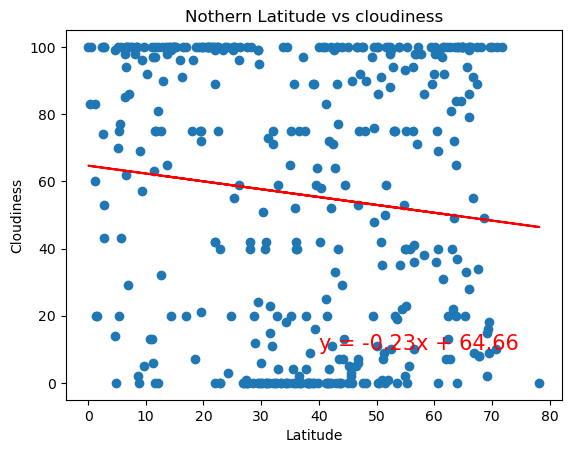

 The R squared is: 0.01


In [20]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Nothern Latitude vs cloudiness", "Latitude", "Cloudiness", (40,10))

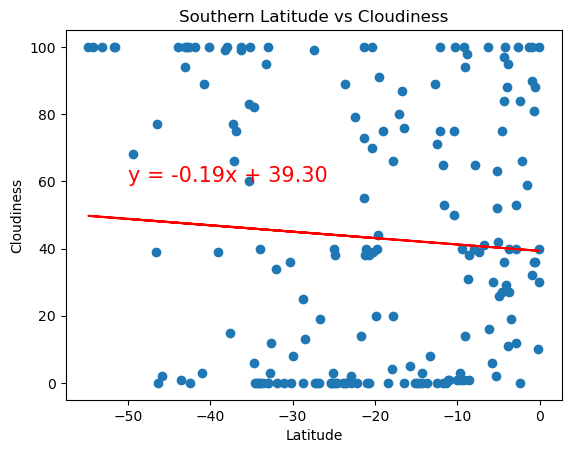

 The R squared is: 0.01


In [21]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Southern Latitude vs Cloudiness", "Latitude", "Cloudiness", (-50,60))

**Discussion about the linear relationship:** It doent look that there are significant correlation between latitdes and cloudiness. So it means that there are other factors that affect weather than cloudiness in a specific latitude. Also the linela regresion has a similar behivor in the nothern that in the southern.

### Wind Speed vs. Latitude Linear Regression Plot

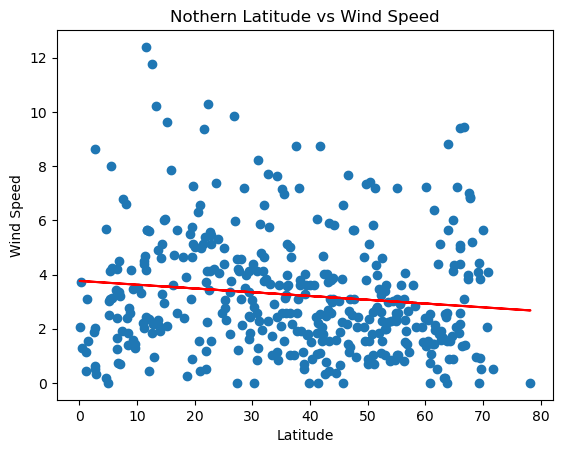

 The R squared is: 0.02


In [22]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Nothern Latitude vs Wind Speed", "Latitude", "Wind Speed", (40,20))

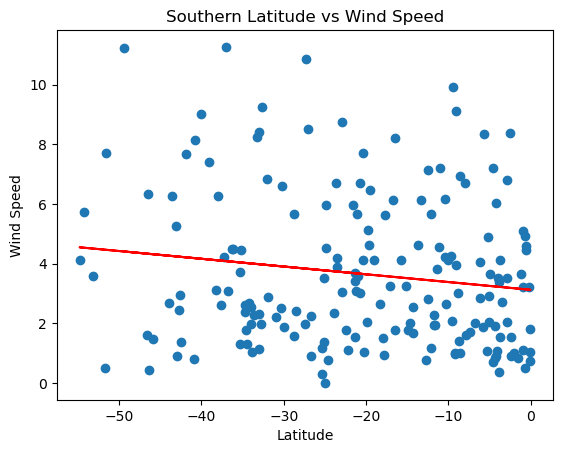

 The R squared is: 0.02


In [23]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Southern Latitude vs Wind Speed", "Latitude", "Wind Speed", (-50,20))

**Discussion about the linear relationship:** In this analisis we can also see that there are not correlation between Wind Speed and latitudes. So predicting wind speed based on latitudes is not feasible.